In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#MUSLIADI
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
#MUSLIADII
SNmusliadi = pd.read_csv('D:/All Data I Have/social_network.csv')
SNmusliadi.head(8)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
5,15728773,27,58000,0
6,15598044,27,84000,0
7,15694829,32,150000,1


In [10]:
#MUSLIADII
SNmusliadi.shape

(400, 4)

In [11]:
#MUSLIADII
SNmusliadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [20]:
#MUSLIADII
SNmusliadi.duplicated().sum()

0

In [21]:
#MUSLIADII
SNmusliadi.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
#MUSLIADII
SNmusliadii = SNmusliadi.drop('User ID',axis=1)
SNmusliadii.head(8)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1


In [56]:
#MUSLIADII
SNmusliadii.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


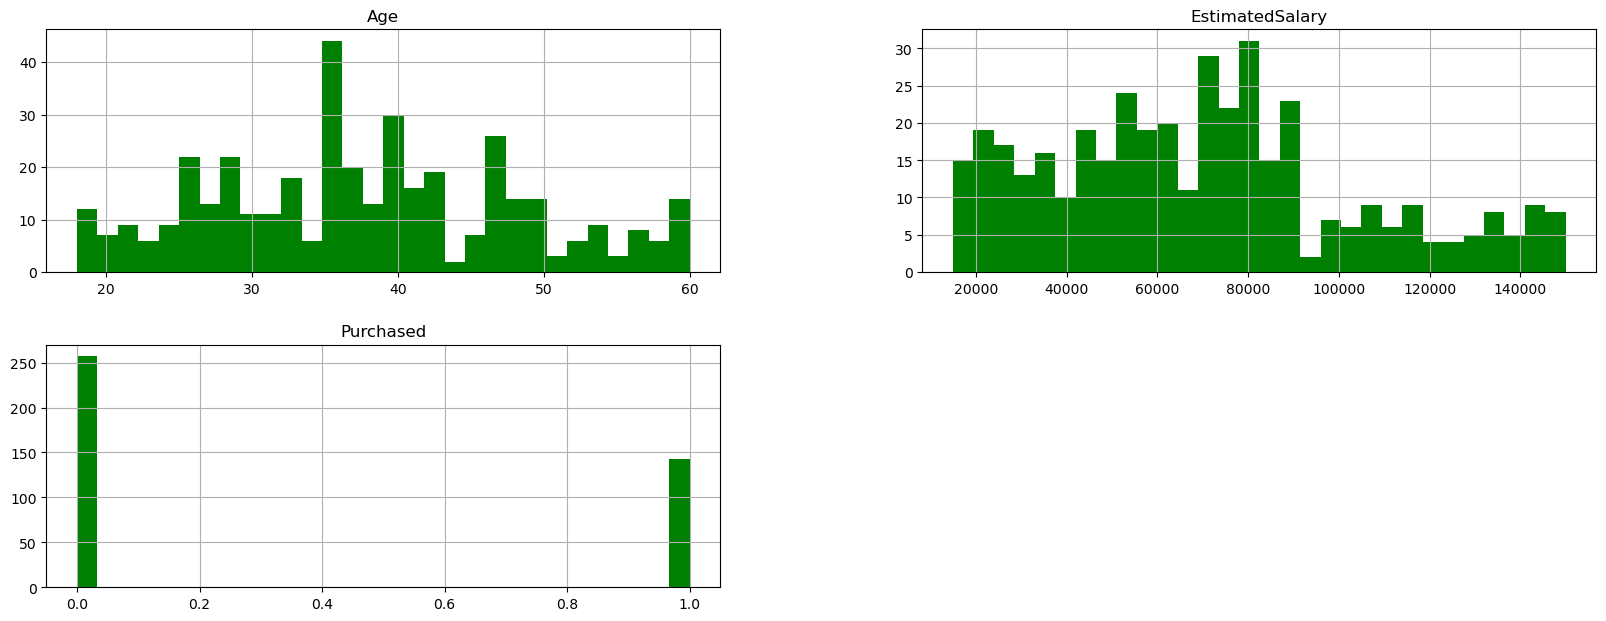

In [6]:
#MUSLIADII
SNmusliadii.hist(bins=30, figsize=(20,40), layout=(10,2), color='green');

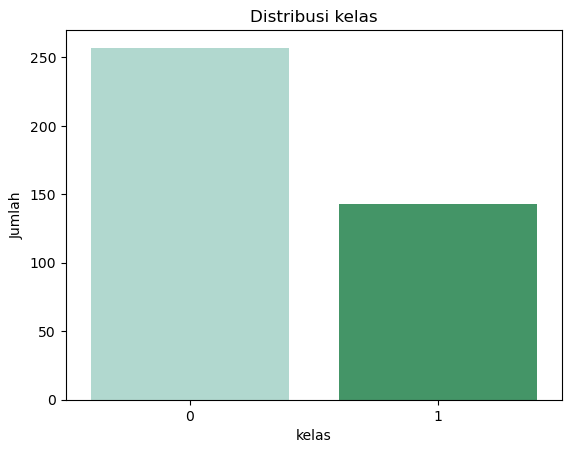

0    0.6425
1    0.3575
Name: Purchased, dtype: float64


In [6]:
#MUSLIADII
class_distribution = SNmusliadii['Purchased'].value_counts()

sns.countplot(data=SNmusliadii, x='Purchased', palette='BuGn')
plt.title('Distribusi kelas')
plt.xlabel('kelas')
plt.ylabel('Jumlah')
plt.show()

class_proportions = SNmusliadi['Purchased'].value_counts(normalize=True)
print(class_proportions)

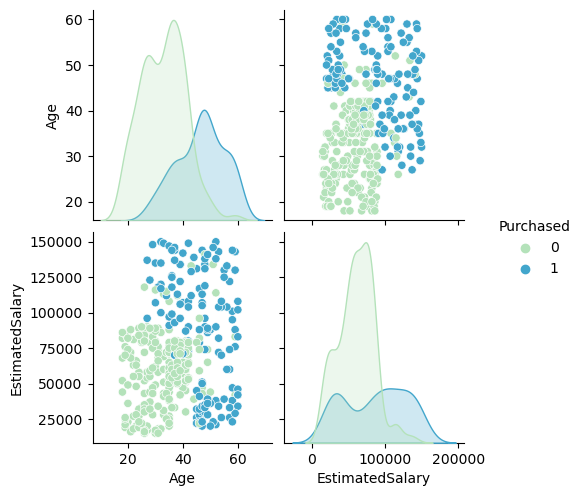

In [6]:
#MUSLIADII
sns.pairplot(SNmusliadii, hue='Purchased', palette='GnBu' )

In [5]:
#MUSLIADII
X = SNmusliadii.iloc[:, :-1].values
y = SNmusliadii.iloc[:, 2].values

In [34]:
#MUSLIADII
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,shuffle=True, stratify=y,  random_state=42)

In [35]:
print("Jumlah baris X_train:", len(X_train))
print("Jumlah baris X_test:", len(X_test))
print("Jumlah baris y_train:", len(y_train))
print("Jumlah baris y_test:", len(y_test))

Jumlah baris X_train: 320
Jumlah baris X_test: 80
Jumlah baris y_train: 320
Jumlah baris y_test: 80


In [36]:
#MUSLIADI
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#MUSLIADII
k_list = list(range(3, 20, 2)) # k yang ganjil saja
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [38]:
#MUSLIADII
from sklearn.metrics import accuracy_score
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  y_pred = knn.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  print(f"K = {k}, Akurasi = {accuracy:.4f}")

K = 3, Akurasi = 0.9281
K = 5, Akurasi = 0.9156
K = 7, Akurasi = 0.9281
K = 9, Akurasi = 0.9250
K = 11, Akurasi = 0.9219
K = 13, Akurasi = 0.9187
K = 15, Akurasi = 0.9156
K = 17, Akurasi = 0.9062
K = 19, Akurasi = 0.9000


In [39]:
#MUSLIADII
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
#MUSLIADII
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.87      0.90      0.88        29

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



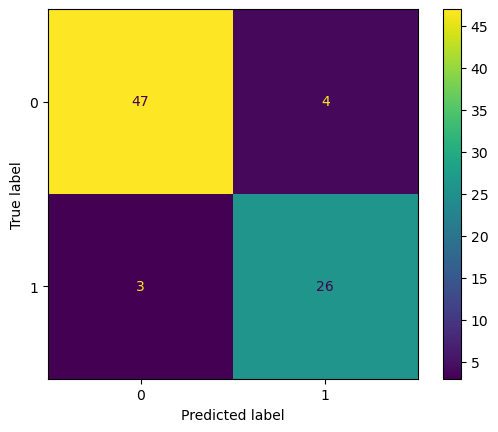

In [41]:
#MUSLIADII
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
disp.plot()